In [8]:
import homographies_2D as homographies_2D
import fonctions_image
from matplotlib import pyplot as plt
import numpy as np
import cv2
import importlib
importlib.reload(homographies_2D)
importlib.reload(fonctions_image)
from homographies_2D import *
from fonctions_image import *

Found 15 valid pieces
Piece areas: [26115, 18234, 25236, 27299, 23123, 19451, 24796, 26013, 19421, 21822, 25111, 18298, 24447, 38373, 18338]


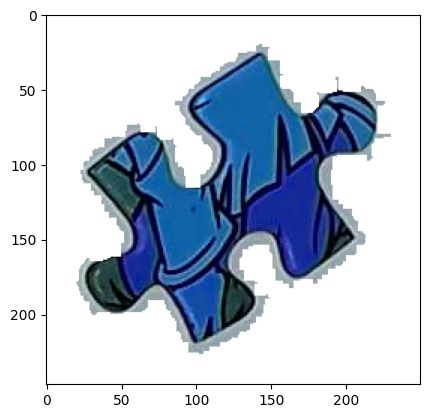

In [21]:
photo_pieces= cv2.imread('/Users/martindrieux/Documents/GitHub/INF573_Puzzle/frame.jpg')
puzzle= cv2.imread('/Users/martindrieux/Documents/GitHub/INF573_Puzzle/nos_puzzles/yakari.jpg')
pieces=extract_pieces(photo_pieces)
piece1=pieces[4]
piece_im=piece1['matching_image']
plt.imshow(piece1['matching_image'])


Matches and their distances:
Match 1: Distance = 156.41
Match 2: Distance = 91.24
Match 3: Distance = 96.03
Match 4: Distance = 160.89
Match 5: Distance = 101.91
Match 6: Distance = 160.82
Match 7: Distance = 181.95
Match 8: Distance = 107.16
Match 9: Distance = 118.21
Match 10: Distance = 123.57
Match 11: Distance = 129.13
Match 12: Distance = 129.36
Match 13: Distance = 139.02
Match 14: Distance = 141.86


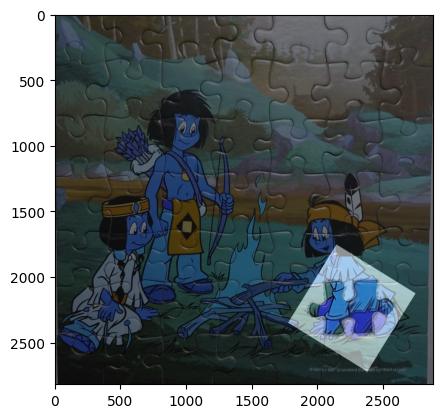

In [24]:
kp_im, des_im=calculate_keypoints_sift(piece1)
sift=cv2.SIFT_create()
kp_puzzle, des_puzzle=sift.detectAndCompute(puzzle, None)
matches=calculate_matches(piece1,puzzle,kp_im,des_im, kp_puzzle,des_puzzle)


src_points = np.array([kp_im[m.queryIdx].pt for m in matches])
dst_points = np.array([kp_puzzle[m.trainIdx].pt for m in matches])


#s, theta, t=estimate_rigid_transform(src_points, dst_points)
Hs=homography_unknown_scale(kp_im, kp_puzzle, matches )
# s, theta, t=decompose_similarity_homography(Hs)
Hb=homography_known_scale(kp_im, kp_puzzle, matches, s)

show_homography_on_puzzle(piece_im, puzzle, Hb)
